In [25]:
# Dataset 1 : Movie
# Output : Awards : Yes or No
# MLPClassifier --> hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter= 1000

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# model 
from sklearn.neural_network import MLPClassifier
# cross validation
from sklearn.model_selection import cross_val_score
# validation curve
from yellowbrick.model_selection import validation_curve
# learning curve
from sklearn.model_selection import learning_curve
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

time1 = time.perf_counter()

model = MLPClassifier(hidden_layer_sizes=(100,), 
                      activation='relu', 
                      solver='adam', max_iter= 1000)

model.fit(X_train,y_train)

validation = cross_val_score(model, X, y, cv=7)
print(validation)
print('Accuracy score =', validation.mean())

#Testing the test set
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)

#time after training and predicting the test sets
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training and predicting the test sets =',timeA,'s')

print('accuracy score =', score)


[0.71505376 0.79032258 0.84946237 0.84946237 0.79569892 0.8
 0.63243243]
Accuracy score = 0.7760617760617761
time for training and predicting the test sets = 2.7908672710000246 s
accuracy score = 0.7846153846153846


time for the learning curve = 45.86476431400024 s


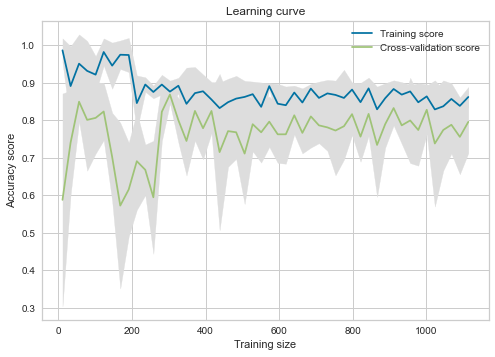

In [26]:
#Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(hidden_layer_sizes=(100,),activation='relu',solver='adam',max_iter= 1000) , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

#time after doing the learning curve
time3 = time.perf_counter()
timeB = time3 - time2
print('time for the learning curve =',timeB,'s')

train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')


plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')

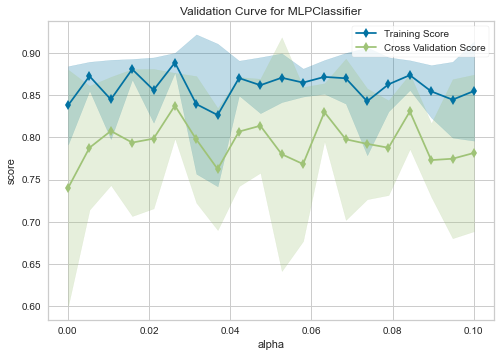

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for MLPClassifier'}, xlabel='alpha', ylabel='score'>,
                cv=7, estimator=MLPClassifier(max_iter=1000),
                param_name='alpha',
                param_range=array([0.0001    , 0.00535789, 0.01061579, 0.01587368, 0.02113158,
       0.02638947, 0.03164737, 0.03690526, 0.04216316, 0.04742105,
       0.05267895, 0.05793684, 0.06319474, 0.06845263, 0.07371053,
       0.07896842, 0.08422632, 0.08948421, 0.09474211, 0.1       ]))
time for doing the validation and learning curve = 87.85638965500038 s


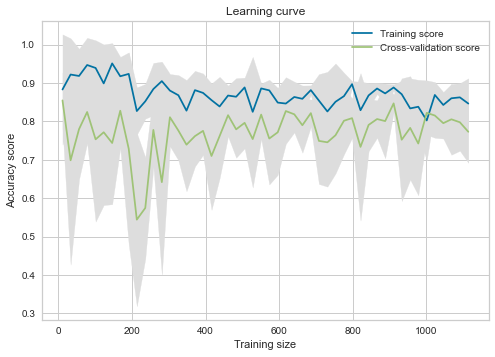

In [8]:
# Hyperparameters : hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter= 1000
# Vary : alpha

time1 = time.perf_counter()

#validation curve
print(validation_curve(MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter= 1000) , 
                       X , y , 
                       param_name ='alpha', 
                       param_range=np.linspace(0.0001,0.1,20), 
                       cv=7, 
                       score='accuracy'))

#learning curve
train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',max_iter= 1000) , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for doing the validation and learning curve =',timeA,'s')

#means
train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

#standard deviation
train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

# plot the figure
plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')

plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

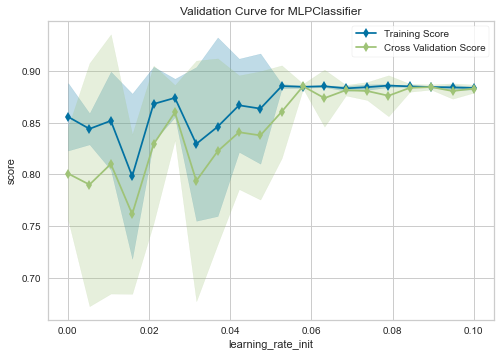

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for MLPClassifier'}, xlabel='learning_rate_init', ylabel='score'>,
                cv=7, estimator=MLPClassifier(alpha=0.026, max_iter=1000),
                param_name='learning_rate_init',
                param_range=array([0.0001    , 0.00535789, 0.01061579, 0.01587368, 0.02113158,
       0.02638947, 0.03164737, 0.03690526, 0.04216316, 0.04742105,
       0.05267895, 0.05793684, 0.06319474, 0.06845263, 0.07371053,
       0.07896842, 0.08422632, 0.08948421, 0.09474211, 0.1       ]))


/Users/ye/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


time for doing the validation and learning curve = 87.30757236299996 s


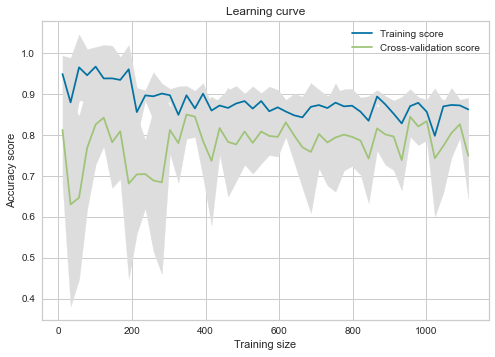

In [9]:
# Hyperparameters : hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter= 1000 , alpha=0.026
# Vary : learning_rate_init

time1 = time.perf_counter()

#validation curve
print(validation_curve(MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter= 1000, alpha=0.026) , 
                       X , y , 
                       param_name ='learning_rate_init', 
                       param_range=np.linspace(0.0001,0.1,20), 
                       cv=7, 
                       score='accuracy'))

#learning curve
train_sizes, train_scores, valid_scores = learning_curve(MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',max_iter= 1000, alpha=0.026) , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for doing the validation and learning curve =',timeA,'s')

#means
train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

#standard deviation
train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

# plot the figure
plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')

plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

In [82]:
# Hyperparameters : hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter= 1000, alpha =0.026, learning_rate_init=0.1

from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss



time1 = time.perf_counter()

model = MLPClassifier(hidden_layer_sizes=(100,), 
                      activation='relu', 
                      solver='adam', 
                      max_iter= 1000, 
                      alpha =0.026, 
                      learning_rate_init=0.1)

model.fit(X_train,y_train)
predictions = model.predict(X_test)

validation = cross_val_score(model, X, y, cv=7)
print(validation)
print('accuracy score for upgraded model= ', validation.mean())

#Testing the test set
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)
print('Test score =', score)

#time after training the model
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training the model =',timeA,'s')


print('----------')

#default model
model2 = MLPClassifier()
model2.fit(X_train,y_train)
predictions = model2.predict(X_test)
validation2 = cross_val_score(model2, X, y, cv=7)
predictions2 = model2.predict(X_test)
score2 = accuracy_score(y_test,predictions2)
print(validation2[1:])
print('accuracy score default model = ', validation2[1:].mean())
print('Test score default model =', score2)

print('----------')

pred = model.predict_proba(X_test)
eval1 = log_loss(y_test,pred)
pred2 = model2.predict_proba(X_test)
eval2 = log_loss(y_test,pred2)
print('log_loss for the model by default :',eval2)
print('log_loss for the upgraded model :', eval1 )

[0.88709677 0.88709677 0.88172043 0.88172043 0.88172043 0.88648649
 0.88648649]
accuracy score for upgraded model=  0.8846182588118071
Test score = 0.8346153846153846
time for training the model = 1.830476898001507 s
----------
[0.82795699 0.70967742 0.80107527 0.76344086 0.88108108 0.79459459]
accuracy score default model =  0.7963043688850141
Test score default model = 0.7961538461538461
----------
log_loss for the model by default : 1.427580122349169
log_loss for the upgraded model : 0.50236559043054
